
# Generative AI - Final project

Romain THOMAS

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

# 1. Image to text generation

### 1.1 First image to text model : blip-image-captioning-large

In [2]:
# Salesforce/blip-image-captioning-large
# https://huggingface.co/Salesforce/blip-image-captioning-large

# I used this user guide:
# https://medium.com/@ranjithkumar.panjabikesanind/build-a-image-captioning-app-leveraging-hugging-face-blip-image-captioning-model-and-gradio-e054bf7f95ff

In [3]:
# Step 1 — Install
!pip install transformers
!pip install gradio==3.48.0
!pip install tf-keras

!pip install -Uqqq
!pip -qqq install bitsandbytes accelerate
!pip install git+https://github.com/huggingface/accelerate

In [4]:
# Step 2 — Build the Image Captioning Pipeline
from transformers import pipeline
image_captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
# Step 3 — Set up Prerequisites for Image Captioning App and User Interface

#Set up Prerequisites for Image Captioning App User Interface
import os
import io
import IPython.display
from PIL import Image
import base64

import gradio as gr

def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))
def captioner(image):
    base64_image = image_to_base64_str(image)
    result = image_captioner(base64_image)
    return result[0]['generated_text']
gr.close_all()

In [6]:
"""
Modification of the code to use it in my Generative AI project code

See below
"""

'\nModification of the code to use it in my Generative AI project code\n\nSee below\n'

In [7]:
import requests
url = "https://www.commeuncamion.com/content/uploads/2022/02/premier-jean-levis.jpg"
image = Image.open(requests.get(url, stream=True).raw)

first_answer = captioner(image)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [8]:
first_answer

'a close up of a pair of jeans with a yellow tag on the back'

In [9]:
"""
Modification of the code to use it in my Generative AI project code

See above
"""

'\nModification of the code to use it in my Generative AI project code\n\nSee above\n'

In [10]:
# Step 4 — Build the Image Captioning App and Launch

ImageCaptionApp = gr.Interface(fn=captioner,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Textbox(label="Caption")],
                    title="Image Captioning with BLIP",
                    description="Caption any image using the BLIP model",
                    allow_flagging="never")

ImageCaptionApp.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d089e99c984879ecfc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### 1.2 Second image to text model : BLIP-2, OPT-2.7b, pre-trained only

In [11]:
# BLIP-2, OPT-2.7b, pre-trained only
# https://huggingface.co/docs/transformers/main/en/model_doc/blip-2#transformers.Blip2ForConditionalGeneration.forward.example

In [14]:
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
import accelerate

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", load_in_8bit=True, device_map={"": 0}, torch_dtype=torch.float16
)  # doctest: +IGNORE_RESULT

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_length=1024)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)
#two cats laying on a couch

two cats laying on a couch


In [16]:
prompt = "Question: how many cats are there? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs, max_length=1024)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)
#two

two


In [17]:
prompt = "Question: on what furniture are laying the cats? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs, max_length=1024)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


on the couch


In [18]:
prompt = "Question: what is the material under the cats? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs, max_length=1024)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


a pink blanket


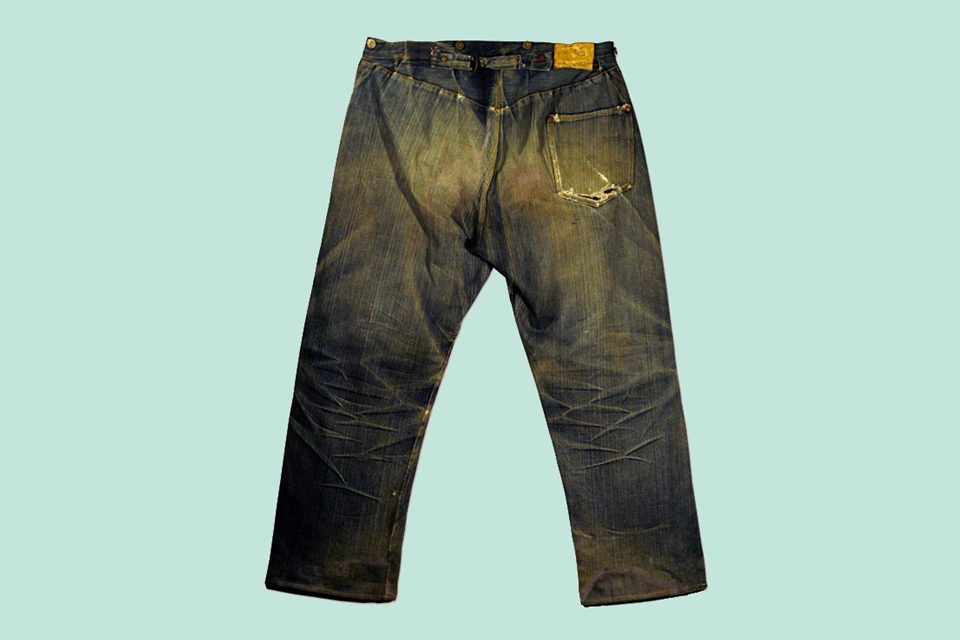

In [37]:
url = "https://www.commeuncamion.com/content/uploads/2022/02/premier-jean-levis.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [20]:
# to clean the cache to ease the process for the GPU
import gc
gc.collect()

156

In [38]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_length=1024)
second_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(second_answer)
#two cats laying on a couch

a pair of jeans with a faded look


In [40]:
import torch

prompt = "Question: How is the clothe? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

torch.cuda.empty_cache()

generated_ids = model.generate(**inputs, max_length=1024)
third_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(third_answer)


It's a bit of a mess


In [23]:
# to clean the cache to ease the process for the GPU
import gc
gc.collect()

81

## 2. Text generation using RAG fine tuned model

In [70]:
concatenated_answers = first_answer.capitalize() + ". " + second_answer.capitalize() + ". " + third_answer.capitalize() + "."
concatenated_answers

"A close up of a pair of jeans with a yellow tag on the back. A pair of jeans with a faded look. It's a bit of a mess."

In [25]:
#!pip install -q torch transformers accelerate bitsandbytes transformers sentence-transformers faiss-gpu

In [26]:
# If running in Google Colab, you may need to run this cell to make sure you're using UTF-8 locale to install LangChain
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [27]:
!pip install -q langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.1 MB/s eta 0:00:00


## Prepare the data


In this example, we'll load all of the issues (both open and closed) from [PEFT library's repo](https://github.com/huggingface/peft).

First, you need to acquire a [GitHub personal access token](https://github.com/settings/tokens?type=beta) to access the GitHub API.

In [28]:
# secret_token_here_before

In [29]:
from getpass import getpass
ACCESS_TOKEN = getpass("GenAI_individual_assignment")

GenAI_individual_assignment··········


Next, we'll load all of the issues in the [huggingface/peft](https://github.com/huggingface/peft) repo:
- By default, pull requests are considered issues as well, here we chose to exclude them from data with by setting `include_prs=False`
- Setting `state = "all"` means we will load both open and closed issues.

In [36]:
"""
Adapting my RAG: https://github.com/zhusz/ICCV17-fashionGAN

Repo:
zhusz/ICCV17-fashionGAN

"""

'\nAdapting my RAG: https://github.com/zhusz/ICCV17-fashionGAN\n\nRepo:\nzhusz/ICCV17-fashionGAN\n\n'

In [62]:
from langchain.document_loaders import GitHubIssuesLoader

loader = GitHubIssuesLoader(
    repo="zhusz/ICCV17-fashionGAN",
    access_token=ACCESS_TOKEN,
    include_prs=False,
    state="all"
)

docs = loader.load()

The content of individual GitHub issues may be longer than what an embedding model can take as input. If we want to embed all of the available content, we need to chunk the documents into appropriately sized pieces.

The most common and straightforward approach to chunking is to define a fixed size of chunks and whether there should be any overlap between them. Keeping some overlap between chunks allows us to preserve some semantic context between the chunks. The recommended splitter for generic text is the [RecursiveCharacterTextSplitter](https://python.langchain.com/docs/modules/data_connection/document_transformers/recursive_text_splitter), and that's what we'll use here.

In [63]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=30)

chunked_docs = splitter.split_documents(docs)

## Create the embeddings + retriever

Now that the docs are all of the appropriate size, we can create a database with their embeddings.

To create document chunk embeddings we'll use the `HuggingFaceEmbeddings` and the [`BAAI/bge-base-en-v1.5`](https://huggingface.co/BAAI/bge-base-en-v1.5) embeddings model. There are many other embeddings models available on the Hub, and you can keep an eye on the best performing ones by checking the [Massive Text Embedding Benchmark (MTEB) Leaderboard](https://huggingface.co/spaces/mteb/leaderboard).


To create the vector database, we'll use `FAISS`, a library developed by Facebook AI. This library offers efficient similarity search and clustering of dense vectors, which is what we need here. FAISS is currently one of the most used libraries for NN search in massive datasets.

We'll access both the embeddings model and FAISS via LangChain API.

In [52]:
!pip install faiss-gpu
!pip install faiss-cpu
!pip install sentence-transformers

In [64]:
import sentence_transformers
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

db = FAISS.from_documents(chunked_docs,
                          HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5'))

We need a way to return(retrieve) the documents given an unstructured query. For that, we'll use the `as_retriever` method using the `db` as a backbone:
- `search_type="similarity"` means we want to perform similarity search between the query and documents
- `search_kwargs={'k': 4}` instructs the retriever to return top 4 results.


In [65]:
retriever = db.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 4}
)

The vector database and retriever are now set up, next we need to set up the next piece of the chain - the model.

## Load quantized model

For this example, we chose [`HuggingFaceH4/zephyr-7b-beta`](https://huggingface.co/HuggingFaceH4/zephyr-7b-beta), a small but powerful model.

With many models being released every week, you may want to substitute this model to the latest and greatest. The best way to keep track of open source LLMs is to check the [Open-source LLM leaderboard](https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard).

To make inference faster, we will load the quantized version of the model:

In [66]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_name = 'HuggingFaceH4/zephyr-7b-beta'

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(model_name)

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

## Setup the LLM chain

Finally, we have all the pieces we need to set up the LLM chain.

First, create a text_generation pipeline using the loaded model and its tokenizer.

Next, create a prompt template - this should follow the format of the model, so if you substitute the model checkpoint, make sure to use the appropriate formatting.

In [67]:
from langchain.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from transformers import pipeline
from langchain_core.output_parsers import StrOutputParser

text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    temperature=0.2,
    do_sample=True,
    repetition_penalty=1.1,
    return_full_text=True,
    max_new_tokens=400,
)

llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

prompt_template = """
<|system|>
Enhance the description of the clothe based on your knowledge to make the item of clothin more attractive. Use the following context to help:

{context}

</s>
<|user|>
{description}
</s>
<|assistant|>

 """

prompt = PromptTemplate(
    input_variables=["context", "description"],
    template=prompt_template,
)

llm_chain = prompt | llm | StrOutputParser()

Note: _You can also use `tokenizer.apply_chat_template` to convert a list of messages (as dicts: `{'role': 'user', 'content': '(...)'}`) into a string with the appropriate chat format._


Finally, we need to combine the `llm_chain` with the retriever to create a RAG chain. We pass the original question through to the final generation step, as well as the retrieved context docs:

In [68]:
from langchain_core.runnables import RunnablePassthrough

retriever = db.as_retriever()

rag_chain = (
 {"context": retriever, "description": RunnablePassthrough()}
    | llm_chain
)


## Compare the results

Let's see the difference RAG makes in generating answers to the library-specific questions.

In [71]:
concatenated_answers

"A close up of a pair of jeans with a yellow tag on the back. A pair of jeans with a faded look. It's a bit of a mess."

First, let's see what kind of answer we can get with just the model itself, no context added:

In [72]:
llm_chain.invoke({"context":"", "description": concatenated_answers})

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


"\n<|system|>\nEnhance the description of the clothe based on your knowledge to make the item of clothin more attractive. Use the following context to help:\n\n\n\n</s>\n<|user|>\nA close up of a pair of jeans with a yellow tag on the back. A pair of jeans with a faded look. It's a bit of a mess.\n</s>\n<|assistant|>\n\n  But this beloved pair of denim has a story to tell, one that begins with its soft and supple fabric crafted from premium cotton. The jeans have been lovingly worn and washed time and again, resulting in a coveted faded look that exudes effortless coolness. The yellow tag on the back is a testament to the brand's commitment to quality and craftsmanship, ensuring that these jeans will stand the test of time. Though they may appear a little disheveled at first glance, it's precisely this imperfect charm that makes them all the more irresistible - a true testament to the timeless appeal of denim. So go ahead, slip into these jeans and let their unique character and unpara

As you can see, the model interpreted the question as one about physical computer adapters, while in the context of PEFT, "adapters" refer to LoRA adapters.
Let's see if adding context from GitHub issues helps the model give a more relevant answer:

In [73]:
rag_chain.invoke(concatenated_answers)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'\n<|system|>\nEnhance the description of the clothe based on your knowledge to make the item of clothin more attractive. Use the following context to help:\n\n[Document(page_content=\'i want to know how to extract image from deepfashion dataset. Can you provide the index table? thank you\', metadata={\'url\': \'https://github.com/zhusz/ICCV17-fashionGAN/issues/14\', \'title\': \'how to extract Deepfashion\', \'creator\': \'sareyu0753\', \'created_at\': \'2021-09-10T15:08:44Z\', \'comments\': 0, \'state\': \'open\', \'labels\': [], \'assignee\': None, \'milestone\': None, \'locked\': False, \'number\': 14, \'is_pull_request\': False}), Document(page_content="The keys are [\'img_root\',\\r\\n \'nameList\',\\r\\n \'engJ\',\\r\\n \'__header__\',\\r\\n \'__globals__\',\\r\\n \'cate_new\',\\r\\n \'sleeve_\',\\r\\n \'codeJ\',\\r\\n \'__version__\',\\r\\n \'color_\',\\r\\n \'gender_\']\\r\\nwhat does the following represent - cate_new, and in color which label referers to which color ??", met

In [ ]:
"""
My comment are in the word file I submited at the same time.

Thank you
"""